# Final Report

## Introduction

We were tasked with finding the "best" neighborhood in Pittsburgh using data from the WPRDC. Frankly, we browsed the website individually for data sets. After we each found one, they just happened to come together perfectly. We came across many different data sets - from air quality to green areas, but we ultimately decided against those data sets.

## The Metric

We used two data sets: 'public safety' and 'fire incidents'. We combined these into the general metric of "safety". In general, the data sets described the amount and type of crime and fire-related incidents in each neighborhood, respectively.

## The Best Neighborhood

First, we copy and compress all the code from each individual notebook and show the individual graphs for each metric.

<Figure size 1440x720 with 0 Axes>

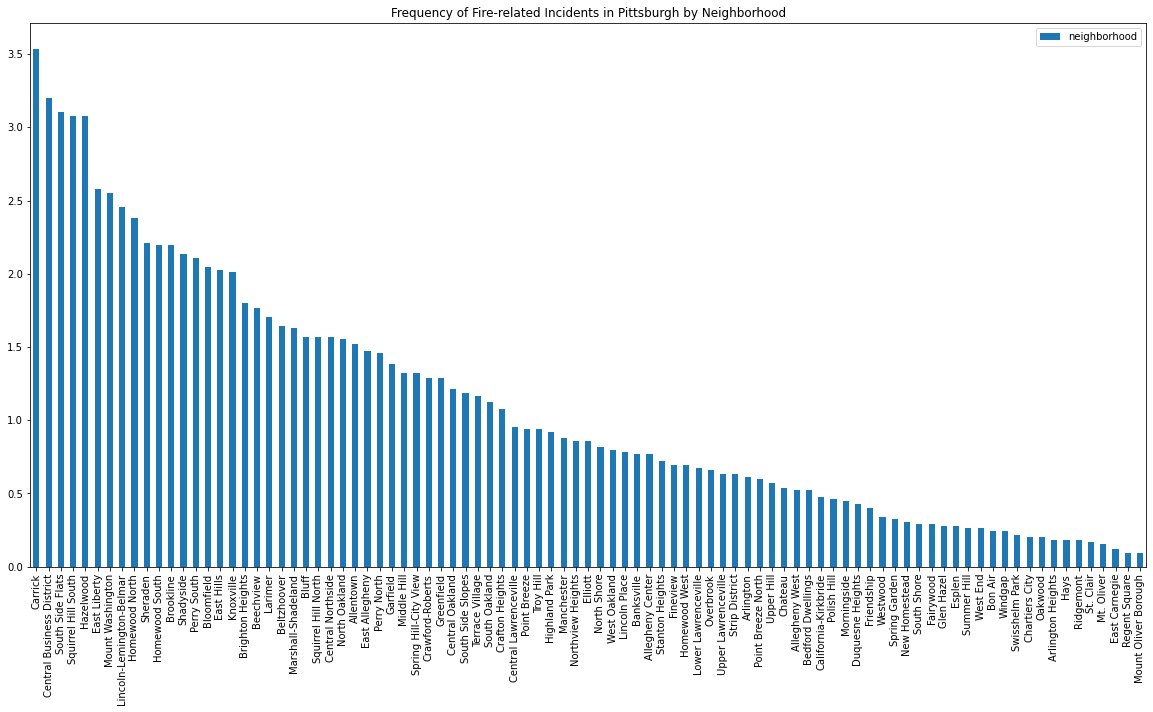

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

incidents = pd.read_csv("fireIncidents.csv")
incidents=incidents.dropna(subset=['neighborhood']).reset_index(drop='true') #drop incidents that are not associated with a neighborhood
rel_incidents=incidents[['type_description','neighborhood']]
count_incidents=rel_incidents['neighborhood'].value_counts()
plt.figure(figsize=(20,10)) # extra room for all the neighborhoods
#count_incidents.plot(kind='bar')

#graph with data as percentages
test=pd.DataFrame(count_incidents)
test=100*test/test.sum()
test.plot(kind='bar',figsize=(20,10),title="Frequency of Fire-related Incidents in Pittsburgh by Neighborhood")


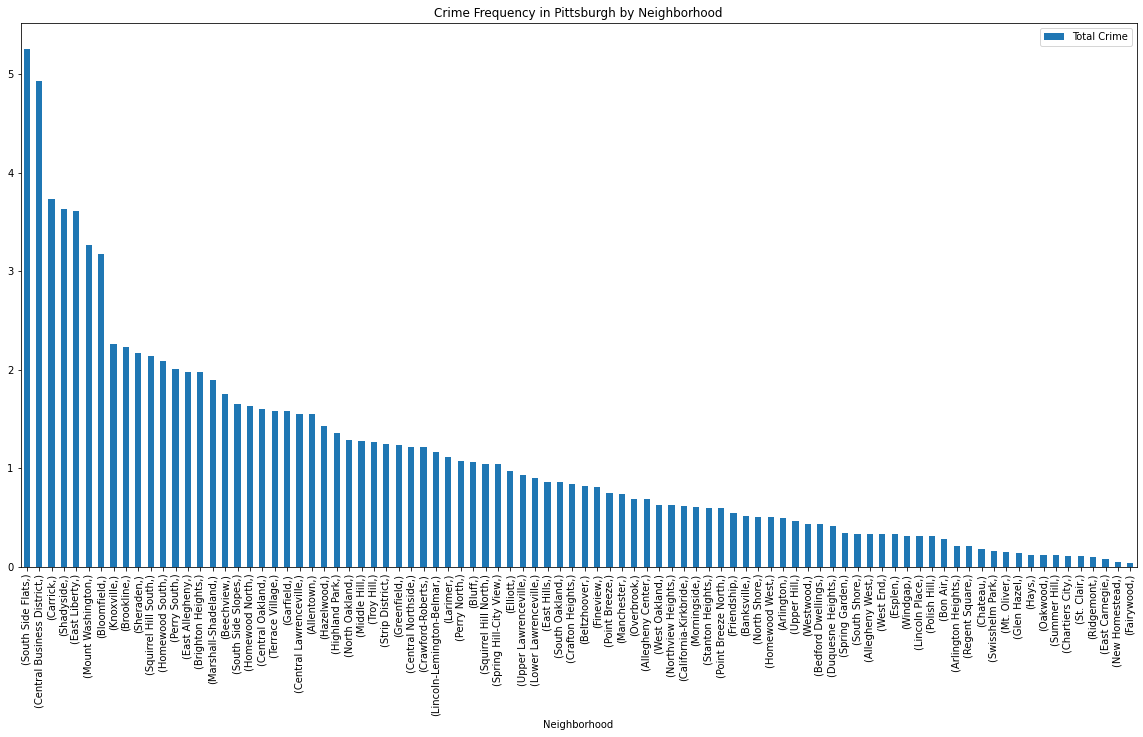

In [2]:
crimes = pd.read_csv("public-safety.csv")

del crimes["Sector #"]
del crimes["Population (2010)"]
del crimes["Part 1 Crime per 100 Persons (2010)"]
del crimes["Part 2 Crime per 100 Persons (2010)"]

#major crimes are weighted twice as heavily
crimes["#Part 1 (Major Crime) Reports (2010)"]=crimes["#Part 1 (Major Crime) Reports (2010)"]*2
#Non major crime reports stay as is (redundant to write here)
crimes["#Part 2 Reports (2010)"]=crimes["#Part 2 Reports (2010)"]*1
#other police reports are only weighted 0.6 as much
crimes["#Other Police Reports (2010)"]=crimes["#Other Police Reports (2010)"]*0.6
#murder reports are weighted as 3 times as important
crimes["#Murder (2010)"]=crimes["#Murder (2010)"]*3
#rape is similarly weighted 3 times as important
crimes["#Rape (2010)"]=crimes["#Rape (2010)"]*3
#robbery is moved down to 0.6 times as important
crimes["#Robbery (2010)"]=crimes["#Robbery (2010)"]*0.6
#Agr. Assult will be weighted by 1.5
crimes["#Agr. Assault (2010)"]=crimes["#Agr. Assault (2010)"]*1.5
#Burglary will remain the same at 1
crimes["#Burglary (2010)"]=crimes["#Burglary (2010)"]*1
#Auto theft will be slightly higher than burglary at 1.5
crimes["#Auto Theft (2010)"]=crimes["#Auto Theft (2010)"]*1.5
#Drug violations will be weighted at only 0.5
crimes["#Drug Violations (2010)"]=crimes["#Drug Violations (2010)"]*0.5

crime_totals = pd.DataFrame([],
                 index=[crimes['Neighborhood']],
                 columns=['Total Crime'])

total=crimes.sum(axis=1)   

i=0 
length=len(crime_totals)

while(i<length):
    crime_totals['Total Crime'].iloc[i]=total[i]
    i+=1;
crime_totals=crime_totals.sort_values(by=['Total Crime'], ascending=False)
#crime_totals.plot.bar(figsize=(20,10),stacked=True)

#graph of percentages
crime_totals=100*crime_totals/crime_totals.sum()
crime_totals.plot(kind='bar',figsize=(20,10),title="Crime Frequency in Pittsburgh by Neighborhood")


In [3]:
crime_totals=crime_totals.sort_values('Neighborhood')
crime_totals

,Total Crime
Neighborhood,
Allegheny Center,0.687167
Allegheny West,0.335482
Allentown,1.5497
Arlington,0.491977
Arlington Heights,0.214061
...,...
Upper Lawrenceville,0.932107
West End,0.333195
West Oakland,0.627695


In [4]:
test=test.rename(columns={"neighborhood":"Total Incidents"}).rename_axis("Neighborhood").sort_values('Neighborhood')
test

,Total Incidents
Neighborhood,
Allegheny Center,0.768403
Allegheny West,0.522514
Allentown,1.521438
Arlington,0.614723
Arlington Heights,0.184417
...,...
Upper Lawrenceville,0.630091
West End,0.261257
West Oakland,0.799139


In [5]:
test=test.reset_index()
num=pd.Series(crime_totals['Total Crime'].tolist())
test['Total Crime']=num
test['Avg']=''
test=test.set_index('Neighborhood')
test.head()

,Total Incidents,Total Crime,Avg
Neighborhood,,,
Allegheny Center,0.768403,0.687167,
Allegheny West,0.522514,0.335482,
Allentown,1.521438,1.549699,
Arlington,0.614723,0.491977,
Arlington Heights,0.184417,0.214061,


In [6]:


for i in test.index:
    test.loc[i,'Avg']=(test.loc[i,'Total Incidents']+test.loc[i,"Total Crime"])/2
test.head()

,Total Incidents,Total Crime,Avg
Neighborhood,,,
Allegheny Center,0.768403,0.687167,0.727785
Allegheny West,0.522514,0.335482,0.428998
Allentown,1.521438,1.549699,1.53557
Arlington,0.614723,0.491977,0.55335
Arlington Heights,0.184417,0.214061,0.199239


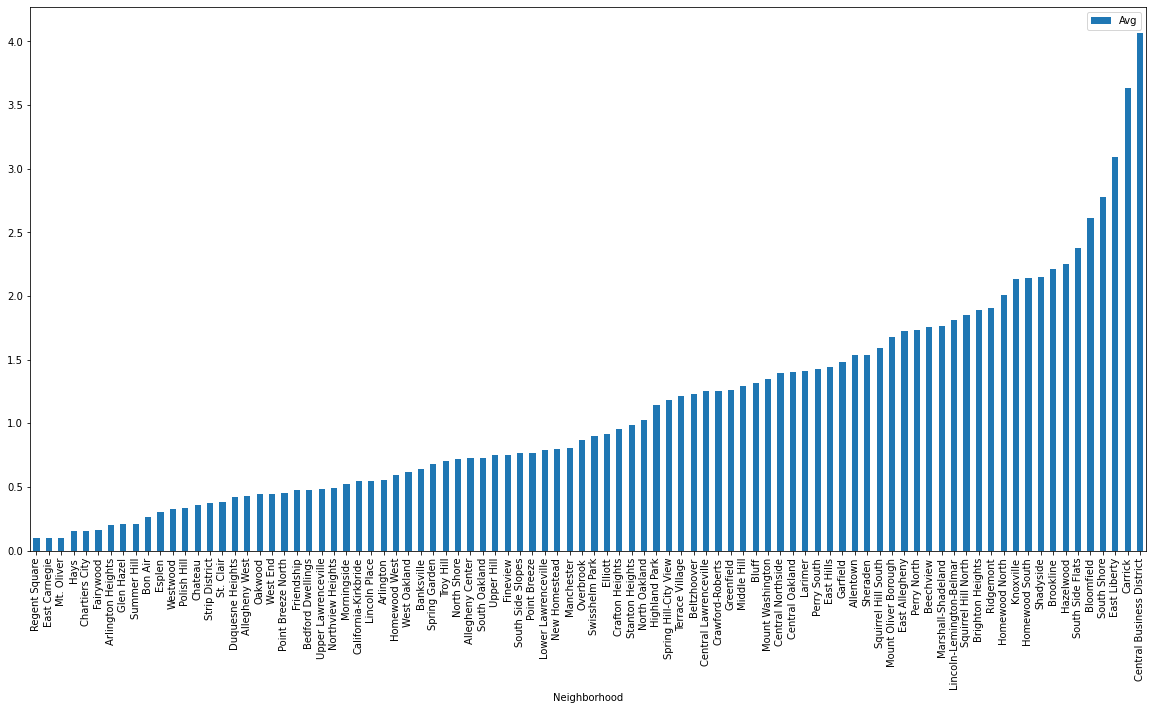

In [9]:
avg=test[["Avg"]]
avg=avg.drop(avg.tail(1).index)
avg=avg.sort_values(["Avg"])
avg.plot(kind="bar",figsize=(20,10))


So, by combining our data sets into a single metric, we see that Central Business District ranks the lowest among the neighborhoods in Pittsburgh when it comes to safety. The best neighborhoods are Mt. Oliver, East Carnegie, and Regent Square since they are all tied for the lowest proportion of incidents.

## Conclusion

Luis: I would be inclined to say that South Oakland is the best neighborhood in Pittsburgh because that is the one that I know the best. I have never heard of several of these neighborhoods, so it would be impossible to compare their data-driven rank to any that I would assign to them. However, seeing that South Oakland is among the top 50% of the neighborhoods does somewhat agree with my personal view of it.

Ben: I have spent very little time in and close around Pittsburgh (I am living at home), so I don't think I can speak to the legitimacy of our results. There are some slight issues with my analysis. I know that areas with a higher police presence will inevitably result in reporting more crimes. Thus, some areas are at a disadvantage. Furthermore, I did not take into account the size of each neighborhood, thus the larger ones are at a disadvantage. Other than that, I am relatively confident in determining that Regent Square, East Carneigie, and Mt. oliver all tie for the best neighborhood in Pittsburgh.